In [1]:
pip install tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall:

In [2]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import roc_auc_score

2025-08-10 06:31:04.874869: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-10 06:31:04.874938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-10 06:31:04.874989: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Exploratory Data Analysis (EDA)**

In [5]:
data = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv')

In [6]:
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [8]:
data.shape

(246022, 40)

In [9]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [10]:
data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [11]:
for col in data.columns:
    print(f"\nFitur: {col}")
    print(data[col].unique())


Fitur: State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Fitur: Sex
['Female' 'Male']

Fitur: GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Fitur: PhysicalHealthDays
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.]

Fitur: MentalHealthDays
[ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8.

In [12]:
for col in data.columns:
    print(f"Value counts for column '{col}':")
    print(data[col].value_counts())
    print("-" * 30)

Value counts for column 'State':
State
Washington              15000
Maryland                 9165
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5462
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4845
South Dakota             4405
Montana                  4264
Missouri                 4195
New Jersey               3967
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
A

In [13]:
print(data.duplicated().sum())
data = data.drop_duplicates()

9


HighRiskLastYear
No     235437
Yes     10576
Name: count, dtype: int64


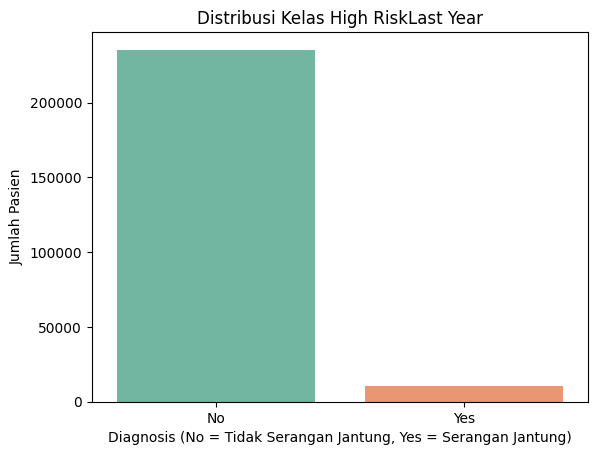

In [14]:
print(data['HighRiskLastYear'].value_counts())

sns.countplot(x='HighRiskLastYear', data=data, palette='Set2')
plt.title('Distribusi Kelas High RiskLast Year')
plt.xlabel('Diagnosis (No = Tidak Serangan Jantung, Yes = Serangan Jantung)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [15]:
numerik = ['PhysicalHealthDays',
           'MentalHealthDays',
           'SleepHours',
           'HeightInMeters',
           'WeightInKilograms',
           'BMI']

kategorikal = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos'
]

Jumlah outlier pada kolom PhysicalHealthDays: 38809
Jumlah outlier pada kolom MentalHealthDays: 32714
Jumlah outlier pada kolom SleepHours: 3488
Jumlah outlier pada kolom HeightInMeters: 830
Jumlah outlier pada kolom WeightInKilograms: 5940
Jumlah outlier pada kolom BMI: 7563


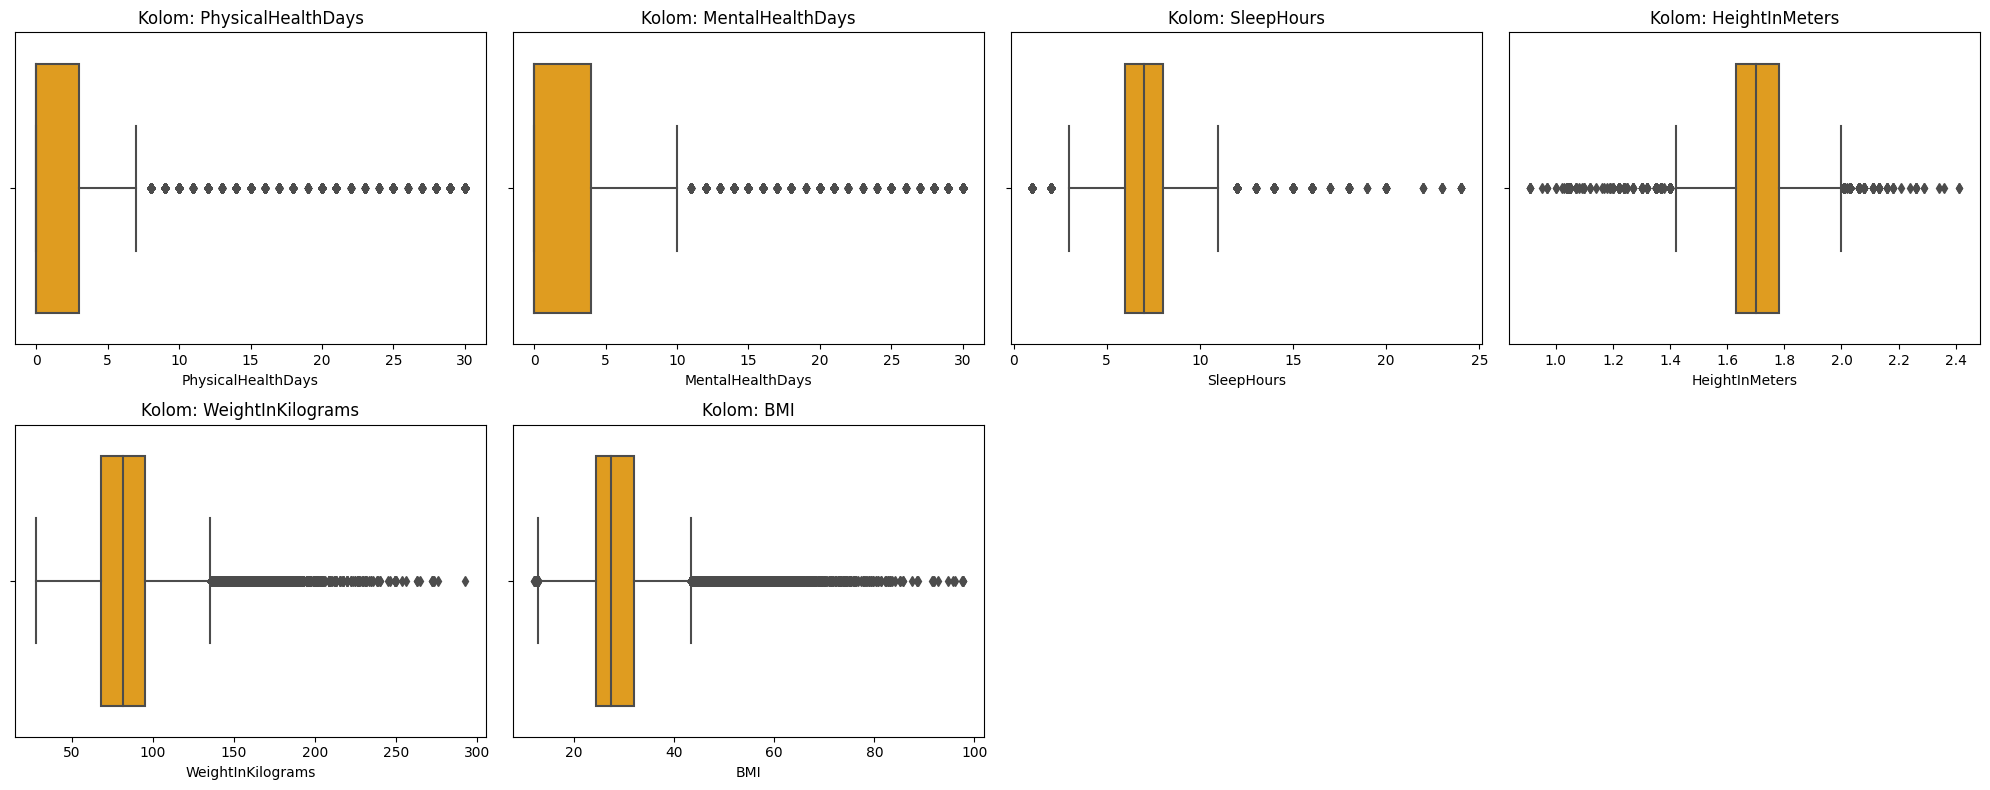


Jumlah total nilai outlier dari semua kolom: 89344
Jumlah baris unik yang mengandung outlier: 66419


In [16]:
def deteksi_outlier_iqr(data, kolom):
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outlier = data[(data[kolom] < batas_bawah) | (data[kolom] > batas_atas)]
    return outlier

total_outlier = 0
outlier_index_set = set()

numerik_valid = [kolom for kolom in numerik if kolom in data.columns]

if not numerik_valid:
    print("Tidak ada kolom numerik yang valid ditemukan di DataFrame.")
else:
    n_cols = 4
    n_rows = (len(numerik_valid) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, kolom in enumerate(numerik_valid):
        outliers = deteksi_outlier_iqr(data, kolom)
        jumlah_outlier = len(outliers)
        total_outlier += jumlah_outlier
        outlier_index_set.update(outliers.index)

        print(f"Jumlah outlier pada kolom {kolom}: {jumlah_outlier}")

        sns.boxplot(data=data, x=kolom, ax=axes[i], color='orange')
        axes[i].set_title(f"Kolom: {kolom}")

    for j in range(len(numerik_valid), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    print(f"\nJumlah total nilai outlier dari semua kolom: {total_outlier}")
    print(f"Jumlah baris unik yang mengandung outlier: {len(outlier_index_set)}")

Data asli setelah Winsorization:


/tmp/ipykernel_19/1548409072.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[kolom] = winsorize_iqr(data, kolom)
/tmp/ipykernel_19/1548409072.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[kolom] = winsorize_iqr(data, kolom)
/tmp/ipykernel_19/1548409072.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246013.000000     246013.000000  246013.000000   246013.000000   
mean             1.899837          2.449822       7.008971        1.705241   
std              2.890348          3.786023       1.324562        0.105744   
min              0.000000          0.000000       3.000000        1.405000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max              7.500000         10.000000      11.000000        2.005000   

       WeightInKilograms            BMI  
count      246013.000000  246013.000000  
mean           83.276263      28.494613  
std            20.157921       5.930094  
min            28.120000      12.840000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%

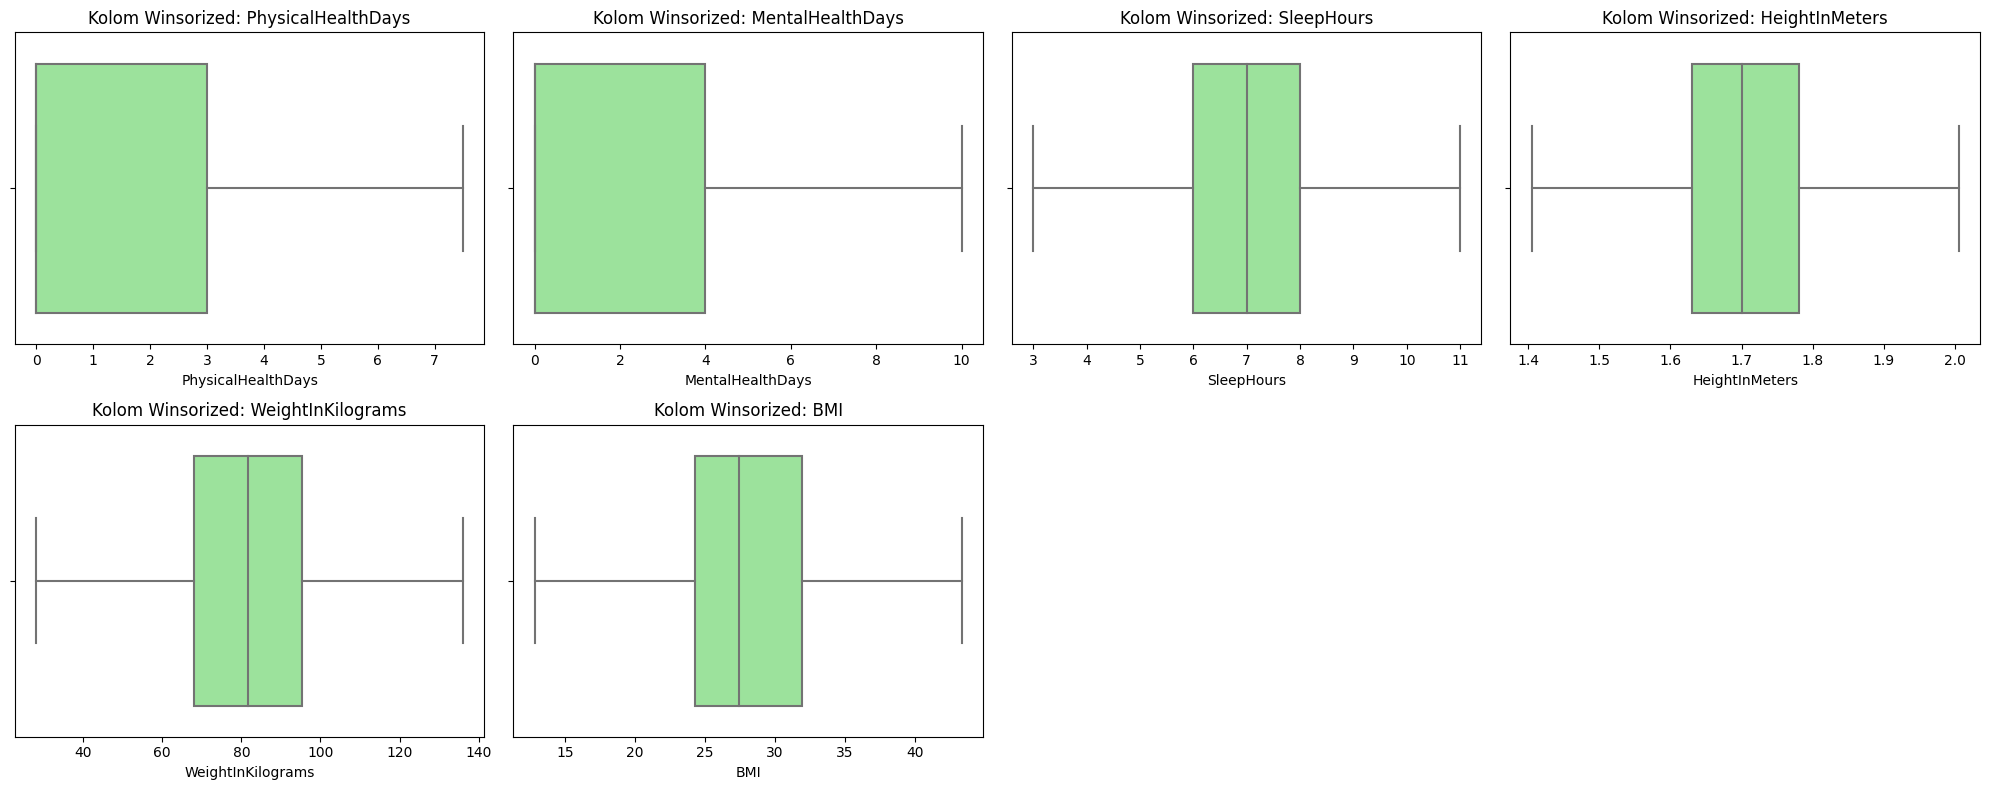

In [17]:
import numpy as np

def winsorize_iqr(data, kolom):
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    kolom_winsorized = data[kolom].copy()
    kolom_winsorized[kolom_winsorized < batas_bawah] = batas_bawah
    kolom_winsorized[kolom_winsorized > batas_atas] = batas_atas
    
    return kolom_winsorized
    

for kolom in numerik_valid:
    data[kolom] = winsorize_iqr(data, kolom)

print("Data asli setelah Winsorization:")
print(data[numerik_valid].describe())

n_cols = 4
n_rows = (len(numerik_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, kolom in enumerate(numerik_valid):
    sns.boxplot(data=data, x=kolom, ax=axes[i], color='lightgreen')
    axes[i].set_title(f"Kolom Winsorized: {kolom}")

for j in range(len(numerik_valid), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

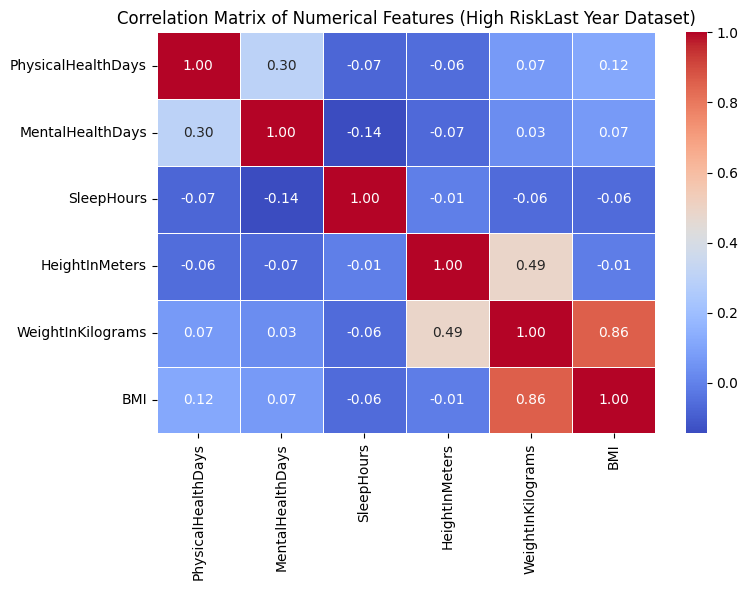

In [18]:
correlation_matrix = data[numerik].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (High RiskLast Year Dataset)', fontsize=12)
plt.tight_layout()
plt.show()

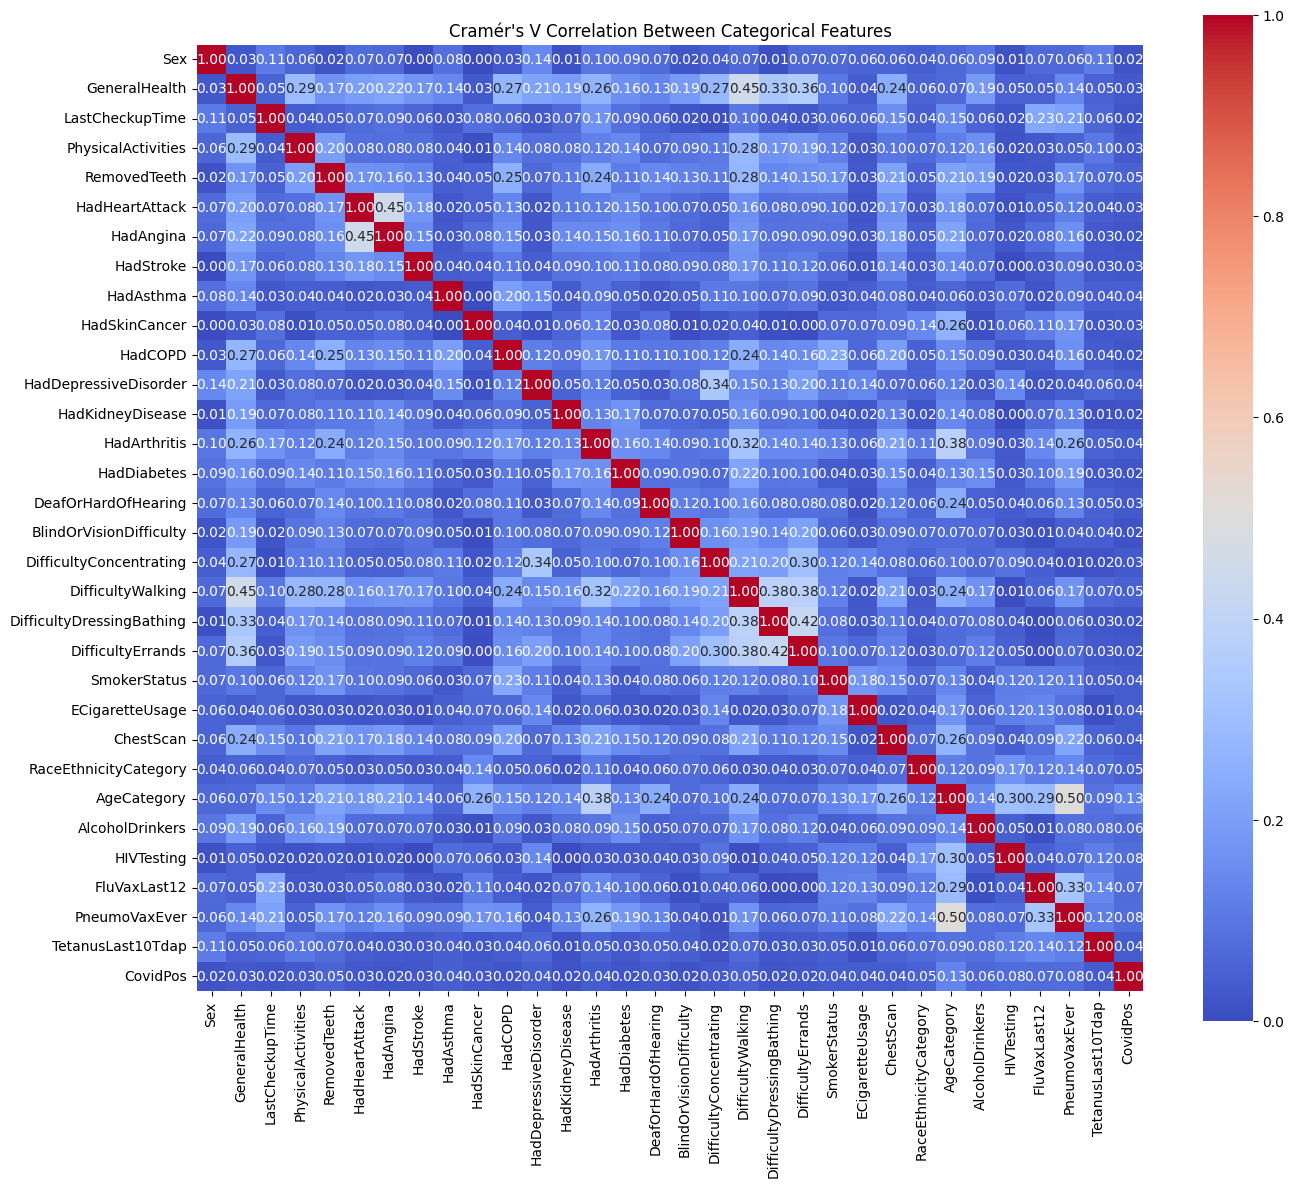

In [19]:
from scipy.stats import chi2_contingency

# Fungsi Cramér's V dengan bias correction
def cramers_v_corrected(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2 / (n-1))
    kcorr = k - ((k-1)**2 / (n-1))
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_matrix = pd.DataFrame(np.zeros((len(kategorikal), len(kategorikal))),
                              index=kategorikal, columns=kategorikal)

for col1 in kategorikal:
    for col2 in kategorikal:
        try:
            cramers_matrix.loc[col1, col2] = cramers_v_corrected(data[col1], data[col2])
        except Exception as e:
            cramers_matrix.loc[col1, col2] = np.nan

# Visualisasi heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, mask=cramers_matrix.isnull())
plt.title("Cramér's V Correlation Between Categorical Features")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_19/485672197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HadHeartAttack'] = data['HadHeartAttack'].map({'Yes': 1, 'No': 0})


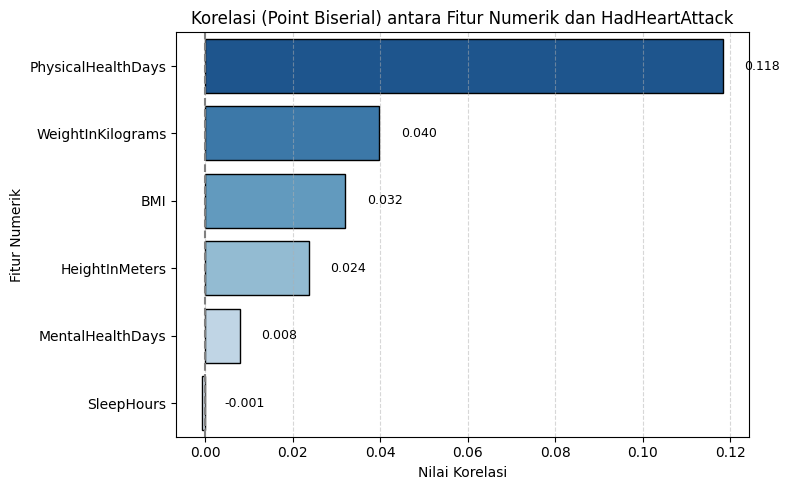

In [20]:
from scipy.stats import pointbiserialr

data['HadHeartAttack'] = data['HadHeartAttack'].map({'Yes': 1, 'No': 0})

hasil_korelasi = {}
for col in numerik:
    corr, pval = pointbiserialr(data[col], data['HadHeartAttack'])
    hasil_korelasi[col] = {
        'PointBiserial': corr,
        'p-value': pval
    }

korelasi_df = pd.DataFrame(hasil_korelasi).T.sort_values(by='PointBiserial', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=korelasi_df.reset_index(),
    y='index',
    x='PointBiserial',
    palette='Blues_r',
    edgecolor='black'
)

for index, value in enumerate(korelasi_df['PointBiserial']):
    plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=9)

plt.title("Korelasi (Point Biserial) antara Fitur Numerik dan HadHeartAttack")
plt.xlabel("Nilai Korelasi")
plt.ylabel("Fitur Numerik")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

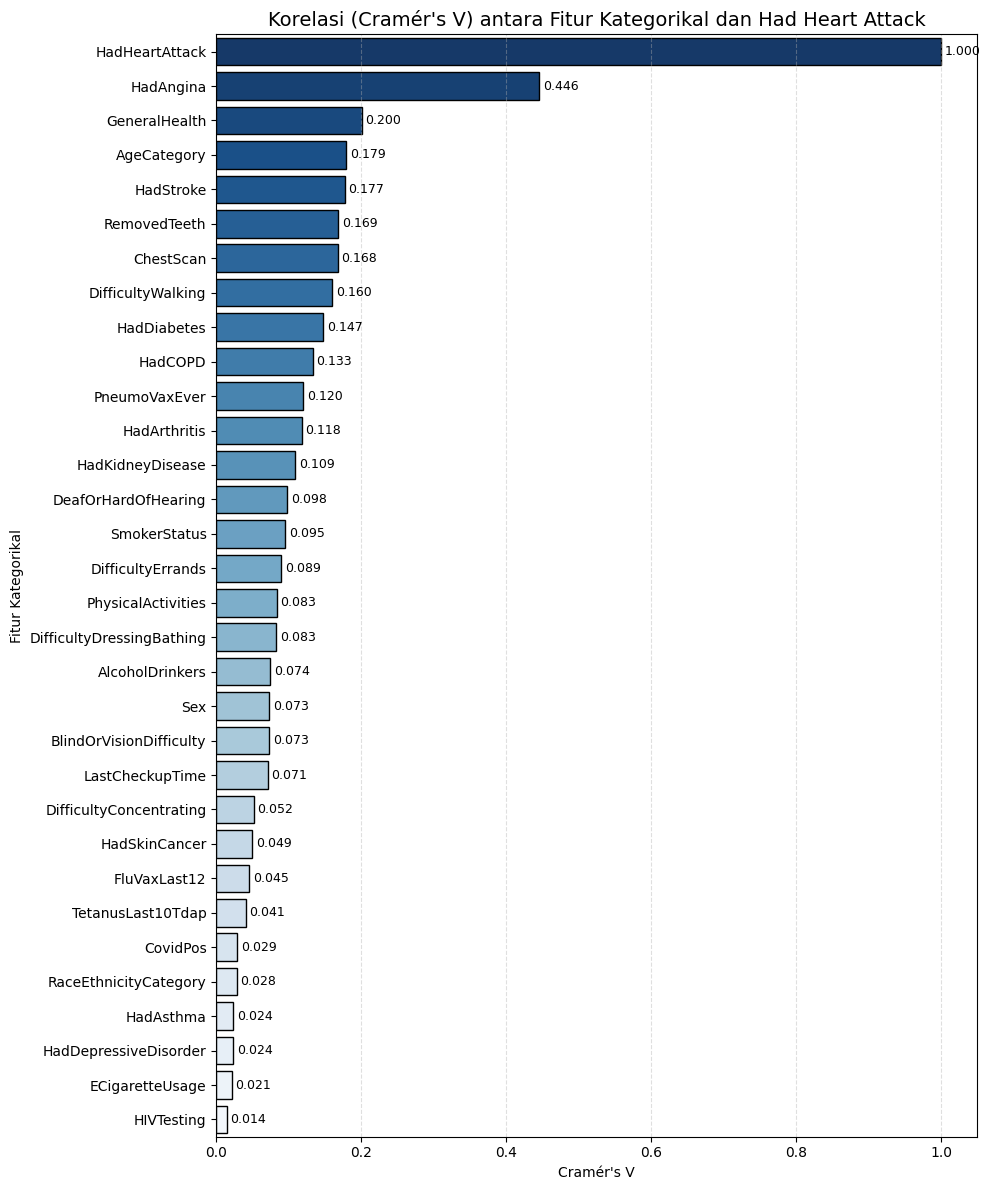

In [21]:
from scipy.stats import chi2_contingency

# Fungsi untuk menghitung Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

target = 'HadHeartAttack'
cramers_results = {}

for col in kategorikal:
    cramers_results[col] = cramers_v(data[col], data[target])

cramer_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['CramersV'])
cramer_df = cramer_df.sort_values(by='CramersV', ascending=False)

cramer_plot_df = cramer_df.reset_index()
cramer_plot_df.columns = ['Fitur', 'CramersV']

plt.figure(figsize=(10, 12))
sns.barplot(
    data=cramer_plot_df,
    y='Fitur',
    x='CramersV',
    palette='Blues_r',
    edgecolor='black'
)

for index, value in enumerate(cramer_plot_df['CramersV']):
    plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=9)

plt.title("Korelasi (Cramér's V) antara Fitur Kategorikal dan Had Heart Attack", fontsize=14)
plt.xlabel("Cramér's V")
plt.ylabel("Fitur Kategorikal")
plt.xlim()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **Preprocessing Data**

In [22]:
data.drop(columns=['State'], inplace=True)
print('State' in data.columns)

False


/tmp/ipykernel_19/506597854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['State'], inplace=True)


In [23]:
print(data.duplicated().sum())
data = data.drop_duplicates()

28


In [24]:
X = data.drop(columns=['HadHeartAttack'])
y = data['HadHeartAttack']

In [25]:
'HadHeartAttack' in X.columns

False

In [26]:
from sklearn.model_selection import train_test_split

# Split awal 80% (train+val) vs 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

# train (87.5%) dan val (12.5%) dari 80%
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,test_size=0.125, random_state=42,stratify=y_temp)

In [27]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (172189, 38)
Validation: (24599, 38)
Test: (49197, 38)


## Data Encoding

In [28]:
def encode_data(df):
    binary_cols = [
        'HadStroke', 'DifficultyWalking', 'AlcoholDrinkers',
        'PhysicalActivities', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer',
        'HadAngina', 'HadCOPD', 'HadDepressiveDisorder', 'DeafOrHardOfHearing',
        'BlindOrVisionDifficulty', 'DifficultyConcentrating',
        'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver','CovidPos'
    ]

    for col in binary_cols:
        if col in df.columns:
            df.loc[:, col] = df[col].map({'Yes': 1, 'No': 0})

    if 'Sex' in df.columns:
        df.loc[:, 'Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

    age_order = [
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
        'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
        'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
        'Age 80 or older'
    ]
    if 'AgeCategory' in df.columns:
        df.loc[:, 'AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=age_order, ordered=True).codes

    health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
    if 'GeneralHealth' in df.columns:
        df.loc[:, 'GeneralHealth'] = pd.Categorical(df['GeneralHealth'], categories=health_order, ordered=True).codes

    checkup_order = [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ]
    if 'LastCheckupTime' in df.columns:
        df.loc[:, 'LastCheckupTime'] = pd.Categorical(df['LastCheckupTime'], categories=checkup_order, ordered=True).codes

    teeth_order = ['None of them', '1 to 5', '6 or more, but not all', 'All']
    if 'RemovedTeeth' in df.columns:
        df.loc[:, 'RemovedTeeth'] = pd.Categorical(df['RemovedTeeth'], categories=teeth_order, ordered=True).codes

    diabetes_order = [
        'No',
        'No, pre-diabetes or borderline diabetes',
        'Yes, but only during pregnancy (female)',
        'Yes'
    ]
    if 'HadDiabetes' in df.columns:
        df.loc[:, 'HadDiabetes'] = pd.Categorical(df['HadDiabetes'], categories=diabetes_order, ordered=True).codes

    object_cols = df.select_dtypes(include='object').columns
    df = pd.get_dummies(df, columns=object_cols, drop_first=True)

    # Konversi kolom boolean True/False jadi 1/0
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)

    return df

X_train_enc = encode_data(X_train)
X_val_enc = encode_data(X_val)
X_test_enc = encode_data(X_test)

## Normalisasi Fitur Numerik

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerik = X_train_enc.select_dtypes(include=['int64', 'float64']).columns

X_train_enc.loc[:, numerik] = scaler.fit_transform(X_train_enc[numerik])
X_val_enc.loc[:, numerik] = scaler.transform(X_val_enc[numerik])
X_test_enc.loc[:, numerik] = scaler.transform(X_test_enc[numerik])

In [30]:
print("X_train_enc:", X_train_enc.shape)
print("X_val_enc:", X_val_enc.shape)
print("X_test_enc:", X_test_enc.shape)

X_train_enc: (172189, 67)
X_val_enc: (24599, 67)
X_test_enc: (49197, 67)


In [31]:
X_train_enc.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_1,GeneralHealth_1,GeneralHealth_2,GeneralHealth_3,...,AgeCategory_12,AlcoholDrinkers_1,HIVTesting_1,FluVaxLast12_1,PneumoVaxEver_1,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_1.0
92155,1.0,0.5,0.250,0.541667,0.268933,0.207349,0,1,0,0,...,0,0,1,1,1,1,0,0,0,1
120525,0.0,0.2,0.625,0.708333,0.537867,0.424213,1,0,0,1,...,0,1,1,0,1,1,0,0,0,0
159989,1.0,1.0,0.625,0.541667,0.315160,0.262139,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
43518,0.0,0.0,0.375,0.658333,0.937051,0.882874,1,0,1,0,...,0,1,0,1,1,0,1,0,0,0
86841,0.0,0.0,0.500,0.575000,0.613553,0.586614,1,0,1,0,...,0,1,1,0,1,1,0,0,0,0


In [32]:
X_train_enc.dtypes.value_counts()

int64      61
float64     6
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_enc, y_train)

print("Setelah SMOTE:")
print("Train:", X_train_bal.shape)
print("Distribusi label:", dict(zip(*np.unique(y_train_bal, return_counts=True))))

Setelah SMOTE:
Train: (325570, 67)
Distribusi label: {0: 162785, 1: 162785}


In [34]:
X_train_bal = X_train_bal.to_numpy().astype('float32')
X_val       = X_val_enc.to_numpy().astype('float32')
X_test      = X_test_enc.to_numpy().astype('float32')

y_train_bal = y_train_bal.to_numpy().astype('float32')
y_val       = y_val.to_numpy().astype('float32')
y_test      = y_test.to_numpy().astype('float32')

## Reshape untuk CNN 1D

In [35]:
# Reshape untuk CNN 1D
X_train_cnn = X_train_bal.reshape(X_train_bal.shape[0], X_train_bal.shape[1], 1)
X_val_cnn   = X_val_enc.values.reshape(X_val_enc.shape[0], X_val_enc.shape[1], 1)
X_test_cnn  = X_test_enc.values.reshape(X_test_enc.shape[0], X_test_enc.shape[1], 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_val_cnn:", X_val_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)

X_train_cnn: (325570, 67, 1)
X_val_cnn: (24599, 67, 1)
X_test_cnn: (49197, 67, 1)


# **Model Development**

## D1 CNN

In [36]:
model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),

    Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 32)            192       
                                                                 
 batch_normalization (Batch  (None, 67, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 67, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 67, 64)            6208      
                                                                 
 batch_normalization_1 (Bat  (None, 67, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 67, 64)            0

In [37]:
early_stop = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

model_ckpt = ModelCheckpoint(
    filepath='best_model_auc.h5',
    monitor='val_auc',
    mode='max',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

history = model.fit(
    X_train_cnn, y_train_bal,
    validation_data=(X_val_cnn, y_val),
    epochs=200,
    batch_size=256,
    callbacks=[early_stop, model_ckpt],
    verbose=1
)

Epoch 1/200
1272/1272 [==============================] - ETA: 0s - loss: 0.3361 - accuracy: 0.8583 - auc: 0.9340
Epoch 1: val_auc improved from -inf to 0.82331, saving model to best_model_auc.h5
1272/1272 [==============================] - 128s 99ms/step - loss: 0.3361 - accuracy: 0.8583 - auc: 0.9340 - val_loss: 0.4761 - val_accuracy: 0.7780 - val_auc: 0.8233
Epoch 2/200
   1/1272 [..............................] - ETA: 2:21 - loss: 0.2555 - accuracy: 0.9023 - auc: 0.9615

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1272/1272 [==============================] - ETA: 0s - loss: 0.2891 - accuracy: 0.8761 - auc: 0.9493
Epoch 2: val_auc did not improve from 0.82331
1272/1272 [==============================] - 126s 99ms/step - loss: 0.2891 - accuracy: 0.8761 - auc: 0.9493 - val_loss: 0.5144 - val_accuracy: 0.7682 - val_auc: 0.8035
Epoch 3/200
1272/1272 [==============================] - ETA: 0s - loss: 0.2752 - accuracy: 0.8833 - auc: 0.9542
Epoch 3: val_auc did not improve from 0.82331
1272/1272 [==============================] - 127s 100ms/step - loss: 0.2752 - accuracy: 0.8833 - auc: 0.9542 - val_loss: 0.4012 - val_accuracy: 0.8182 - val_auc: 0.8215
Epoch 4/200
1272/1272 [==============================] - ETA: 0s - loss: 0.2627 - accuracy: 0.8895 - auc: 0.9582
Epoch 4: val_auc did not improve from 0.82331
1272/1272 [==============================] - 126s 99ms/step - loss: 0.2627 - accuracy: 0.8895 - auc: 0.9582 - val_loss: 0.3802 - val_accuracy: 0.8303 - val_auc: 0.8199
Epoch 5/200
1272/1272 [=======

In [38]:
y_pred_proba_cnn = model.predict(X_test_cnn).ravel()

auc_cnn = roc_auc_score(y_test, y_pred_proba_cnn)
print(f"AUC CNN: {auc_cnn:.4f}")

1538/1538 [==============================] - 8s 5ms/step
AUC CNN: 0.8112


1538/1538 [==============================] - 7s 5ms/step
Classification Report (CNN - Test Set):
              precision    recall  f1-score   support

          No       0.98      0.78      0.87     46510
         Yes       0.15      0.69      0.25      2687

    accuracy                           0.77     49197
   macro avg       0.56      0.73      0.56     49197
weighted avg       0.93      0.77      0.83     49197



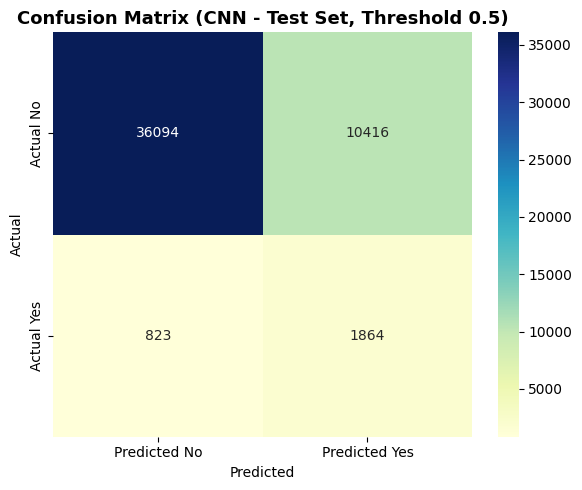

In [39]:
y_test_proba = model.predict(X_test_cnn)
y_test_pred = (y_test_proba > 0.5).astype(int).flatten()

print("Classification Report (CNN - Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (CNN - Test Set, Threshold 0.5)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## TabNet

In [40]:
tabnet_model = TabNetClassifier(
    n_d=64,
    n_a=64,
    n_steps=5,
    gamma=0.9,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    seed=42
)

history = tabnet_model.fit(
    X_train=X_train_bal, y_train=y_train_bal,
    eval_set=[(X_train_bal, y_train_bal), (X_val, y_val)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy', 'auc'],
    max_epochs=200,
    patience=20,
    batch_size=256,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.35546 | train_accuracy: 0.87566 | train_auc: 0.95099 | val_accuracy: 0.82398 | val_auc: 0.82071 |  0:01:08s
epoch 1  | loss: 0.28671 | train_accuracy: 0.88311 | train_auc: 0.95484 | val_accuracy: 0.8604  | val_auc: 0.81511 |  0:02:15s
epoch 2  | loss: 0.27265 | train_accuracy: 0.89348 | train_auc: 0.96232 | val_accuracy: 0.88345 | val_auc: 0.83876 |  0:03:22s
epoch 3  | loss: 0.25342 | train_accuracy: 0.90738 | train_auc: 0.96907 | val_accuracy: 0.88223 | val_auc: 0.83329 |  0:04:29s
epoch 4  | loss: 0.24003 | train_accuracy: 0.91678 | train_auc: 0.97373 | val_accuracy: 0.87032 | val_auc: 0.82013 |  0:05:37s
epoch 5  | loss: 0.2217  | train_accuracy: 0.92728 | train_auc: 0.97867 | val_accuracy: 0.88398 | val_auc: 0.82568 |  0:06:44s
epoch 6  | loss: 0.21152 | train_accuracy: 0.93177 | train_auc: 0.98038 | val_accuracy: 0.88081 | val_auc: 0.81967 |  0:07:51s
epoch 7  | loss: 0.19591 | train_accuracy: 0.93042 | train_auc: 0.98172 | val_accuracy: 0.85841 | val_auc: 0.81

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [41]:
y_pred_proba_tabnet = tabnet_model.predict_proba(X_test)[:, 1]

auc_tabnet = roc_auc_score(y_test, y_pred_proba_tabnet)
print(f"AUC TabNet: {auc_tabnet:.4f}")

AUC TabNet: 0.8258


Classification Report (TabNet - Test Set):
              precision    recall  f1-score   support

          No       0.97      0.90      0.93     46510
         Yes       0.23      0.50      0.31      2687

    accuracy                           0.88     49197
   macro avg       0.60      0.70      0.62     49197
weighted avg       0.93      0.88      0.90     49197



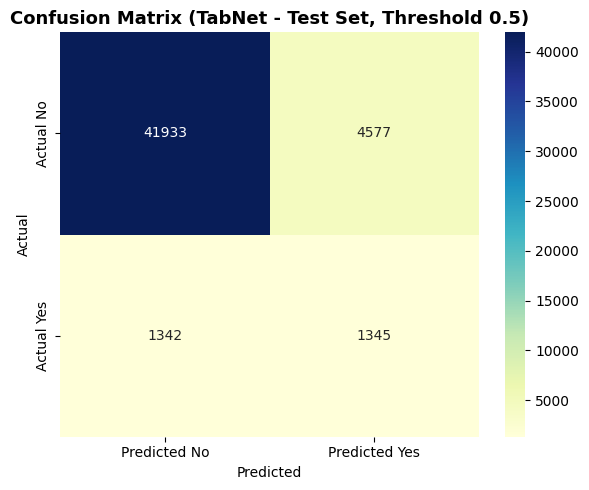

In [42]:
y_test_pred = (tabnet_model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

print("Classification Report (TabNet - Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (TabNet - Test Set, Threshold 0.5)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=7,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

model_rf.fit(X_train_bal, y_train_bal)
y_test_pred = model_rf.predict(X_test)

Classification Report (Rndom Forest-Test Set)
              precision    recall  f1-score   support

          No       0.98      0.84      0.90     46510
         Yes       0.21      0.72      0.32      2687

    accuracy                           0.83     49197
   macro avg       0.59      0.78      0.61     49197
weighted avg       0.94      0.83      0.87     49197



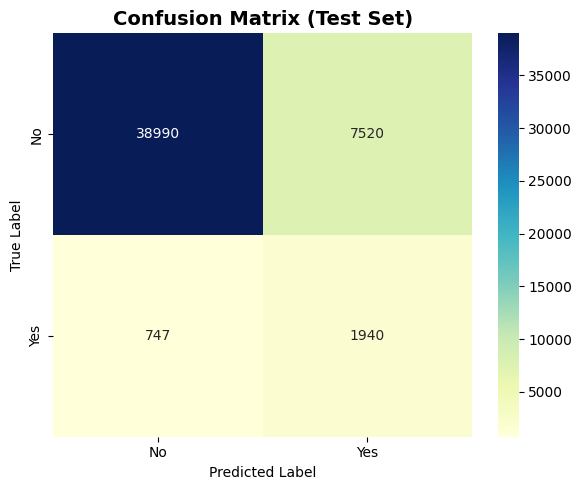

AUC Random Forest: 0.8661


In [44]:
print("Classification Report (Rndom Forest-Test Set)")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Skor AUC
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC Random Forest: {auc_rf:.4f}")

# Analisis Hasil

## Perbandingan Model

| Kriteria | CNN | TabNet | Random Forest | Keterangan |
| :--- | :--- | :--- | :--- | :--- |
| **Akurasi** | 83% | **88%** | 83% | **TabNet** memiliki akurasi keseluruhan terbaik. |
| **Recall (Yes)** | 61% | 50% | **72%** | **Random Forest** paling efektif dalam mengidentifikasi kasus positif (kelas 'Yes'). |
| **Precision (Yes)** | 18% | **23%** | 21% | **TabNet** memiliki tingkat kesalahan prediksi positif (kelas 'Yes') terendah. |
| **F1-Score (Yes)** | 28% | 31% | **32%** | **Random Forest** memiliki keseimbangan terbaik antara *precision* dan *recall* untuk kelas positif. |
| **AUC** | 0.8153 | 0.8258 | **0.8661** | **Random Forest** memiliki kemampuan terbaik dalam membedakan antara kelas positif dan negatif. |

---

## Ringkasan Analisis

* **TabNet** adalah model yang paling akurat secara keseluruhan, dengan akurasi tertinggi sebesar **88%** dan *precision* terbaik untuk kelas 'Yes', yang berarti ketika TabNet memprediksi 'Yes', prediksinya cenderung lebih benar dibandingkan model lain.
* **Random Forest** menunjukkan kinerja paling kuat dalam mengidentifikasi kasus positif (kelas 'Yes') dengan *recall* tertinggi sebesar **72%** dan nilai **AUC** terbaik sebesar **0.8661**. Ini menunjukkan Random Forest sangat baik dalam menemukan sebagian besar kasus positif yang ada.
* **CNN** memiliki performa yang paling rendah di antara ketiga model, terutama pada metrik *precision* dan *f1-score* untuk kelas 'Yes', menunjukkan bahwa model ini sering membuat kesalahan dalam memprediksi kelas positif.